# __WeatherPy Week 6 Assignment__

> ## __Observations:__

> ### -  

# __Dependencies__

In [83]:
%matplotlib notebook

In [84]:
import csv
import numpy as np
import pandas as pd

import logging

import matplotlib.pyplot as plt
import requests
import pandas as pd
from citipy import citipy
import json
from config import weather_api_key
import time
from datetime import datetime
import seaborn as sns

np.random.seed()

In [20]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# __Setting Parameters__

In [21]:
# To ensure we have 500 cities, selecting more cities for the possiblitiey that there may be some that don't have data available
n = 700 
cities = []
country_codes = []

#lats (-90, 90) lngs (-180, 180)
for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    # Make sure that the randomly generated city is not already in our series
    # If it is, regenerate the lat and lng until we get one that isn't
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Add the data to our lists
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]

# __API Call__

In [22]:
# Establishing URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# __Calling, Looping Through Data__

In [24]:
# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query_url}{cities[x]},{country_codes[x].upper()}").json()
    time.sleep(0.25)
    # If the cities we generate don't have data in openweathermap, we want to set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # If it's not cloudy! Then 'clouds' does not exist, so set it to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
# Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query_url}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")


Processing record 1 | mushie
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=mushie,CD
Processing record 2 | karatau
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=karatau,KZ
Processing record 3 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=ponta do sol,CV
Processing record 4 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=vila franca do campo,PT
Processing record 5 | lompoc
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=lompoc,US
Processing record 6 | upernavik
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=upernavik,GL
Processing record 7 | dyurtyuli
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd

Processing record 57 | eureka
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=eureka,US
Processing record 58 | touros
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=touros,BR
Processing record 59 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=victoria,SC
Processing record 60 | lamu
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=lamu,KE
Processing record 61 | aykhal
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=aykhal,RU
Processing record 62 | nguiu
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=nguiu,AU
Processing record 63 | nogent-le-rotrou
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=n

Processing record 113 | samalaeulu
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=samalaeulu,WS
Processing record 114 | livadia
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=livadia,CY
Processing record 115 | ampanihy
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=ampanihy,MG
Processing record 116 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=hasaki,JP
Processing record 117 | dondo
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=dondo,MZ
Processing record 118 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=severo-kurilsk,RU
Processing record 119 | ngunguru
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561

Processing record 169 | tabory
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=tabory,RU
Processing record 170 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=cidreira,BR
Processing record 171 | airai
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=airai,PW
Processing record 172 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=bambous virieux,MU
Processing record 173 | altay
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=altay,CN
Processing record 174 | ligatne
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=ligatne,LV
Processing record 175 | zhangye
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842

Processing record 224 | margate
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=margate,ZA
Processing record 225 | olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=olafsvik,IS
Processing record 226 | pendembu
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=pendembu,SL
Processing record 227 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=narsaq,GL
Processing record 228 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=sioux lookout,CA
Processing record 229 | san vicente
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=san vicente,PH
Processing record 230 | tshikapa
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2

Processing record 279 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=chuy,UY
Processing record 280 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=arraial do cabo,BR
Processing record 281 | maragogi
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=maragogi,BR
Processing record 282 | progreso
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=progreso,MX
Processing record 283 | siderno
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=siderno,IT
Processing record 284 | kazerun
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=kazerun,IR
Processing record 285 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1

Processing record 335 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=klaksvik,FO
Processing record 336 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=husavik,IS
Processing record 337 | hua hin
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=hua hin,TH
Processing record 338 | kirakira
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=kirakira,SB
Processing record 339 | boa vista
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=boa vista,BR
Processing record 340 | mahates
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=mahates,CO
Processing record 341 | la tuque
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c84

Processing record 391 | ambodifototra
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=ambodifototra,MG
Processing record 392 | tibati
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=tibati,CM
Processing record 393 | harper
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=harper,LR
Processing record 394 | stoyba
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=stoyba,RU
Processing record 395 | gazojak
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=gazojak,TM
Processing record 396 | nicolas bravo
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=nicolas bravo,MX
Processing record 397 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1

Processing record 446 | evensk
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=evensk,RU
Processing record 447 | ortigueira
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=ortigueira,BR
Processing record 448 | sampit
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=sampit,ID
Processing record 449 | sivas
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=sivas,TR
Processing record 450 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=cayenne,GF
Processing record 451 | north myrtle beach
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=north myrtle beach,US
Processing record 452 | kargopol
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1

Processing record 502 | digapahandi
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=digapahandi,IN
Processing record 503 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=cap malheureux,MU
Processing record 504 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=ilulissat,GL
Processing record 505 | koslan
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=koslan,RU
Processing record 506 | edson
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=edson,CA
Processing record 507 | buqayq
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=buqayq,SA
Processing record 508 | domoni
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561

Processing record 558 | tir pol
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=tir pol,AF
Processing record 559 | duluth
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=duluth,US
Processing record 560 | salamiyah
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=salamiyah,SY
Processing record 561 | chicama
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=chicama,PE
Processing record 562 | nola
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=nola,CF
Processing record 563 | galesong
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=galesong,ID
Processing record 564 | kargapolye
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units

Processing record 614 | vao
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=vao,NC
Processing record 615 | akdagmadeni
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=akdagmadeni,TR
Processing record 616 | te anau
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=te anau,NZ
Processing record 617 | sembe
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=sembe,CG
Processing record 618 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=fortuna,US
Processing record 619 | sabzevar
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=sabzevar,IR
Processing record 620 | xiangxiang
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units

Processing record 670 | sandwick
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=sandwick,GB
Processing record 671 | mutsamudu
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=mutsamudu,KM
Processing record 672 | portland
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=portland,AU
Processing record 673 | verkhoturye
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=verkhoturye,RU
Processing record 674 | kaohsiung
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=kaohsiung,TW
Processing record 675 | pringsewu
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270c1fdd2b1d561bc818c842b&units=Imperial&q=pringsewu,ID
Processing record 676 | kamennogorsk
http://api.openweathermap.org/data/2.5/weather?appid=571b14c270

# __Creating Dataframe__

In [43]:
# Assemble everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": country_codes
                          })
weather_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date,Country
0,mushie,-3.02,16.92,75.0,77.09,76,2.84,1.534970e+09,CD
1,karatau,43.18,70.46,56.0,51.35,0,4.41,1.534970e+09,KZ
2,ponta do sol,17.20,-25.09,100.0,75.83,80,11.68,1.534970e+09,CV
3,vila franca do campo,37.72,-25.43,73.0,73.40,40,4.70,1.534968e+09,PT
4,lompoc,34.64,-120.46,60.0,73.40,1,9.17,1.534968e+09,US


In [44]:
# Remove any cities that have NaN values
weather_df = weather_df.dropna(how='any')

print(f"The number of unique cities in this dataframe is {len(weather_df['City'])}.")

The number of unique cities in this dataframe is 622.


In [90]:
weather_df.head()

# Export file as a CSV
weather_df.to_csv("output_weatherpy.csv")

# __Latitude vs. Max Temperature__ 

<IPython.core.display.Javascript object>


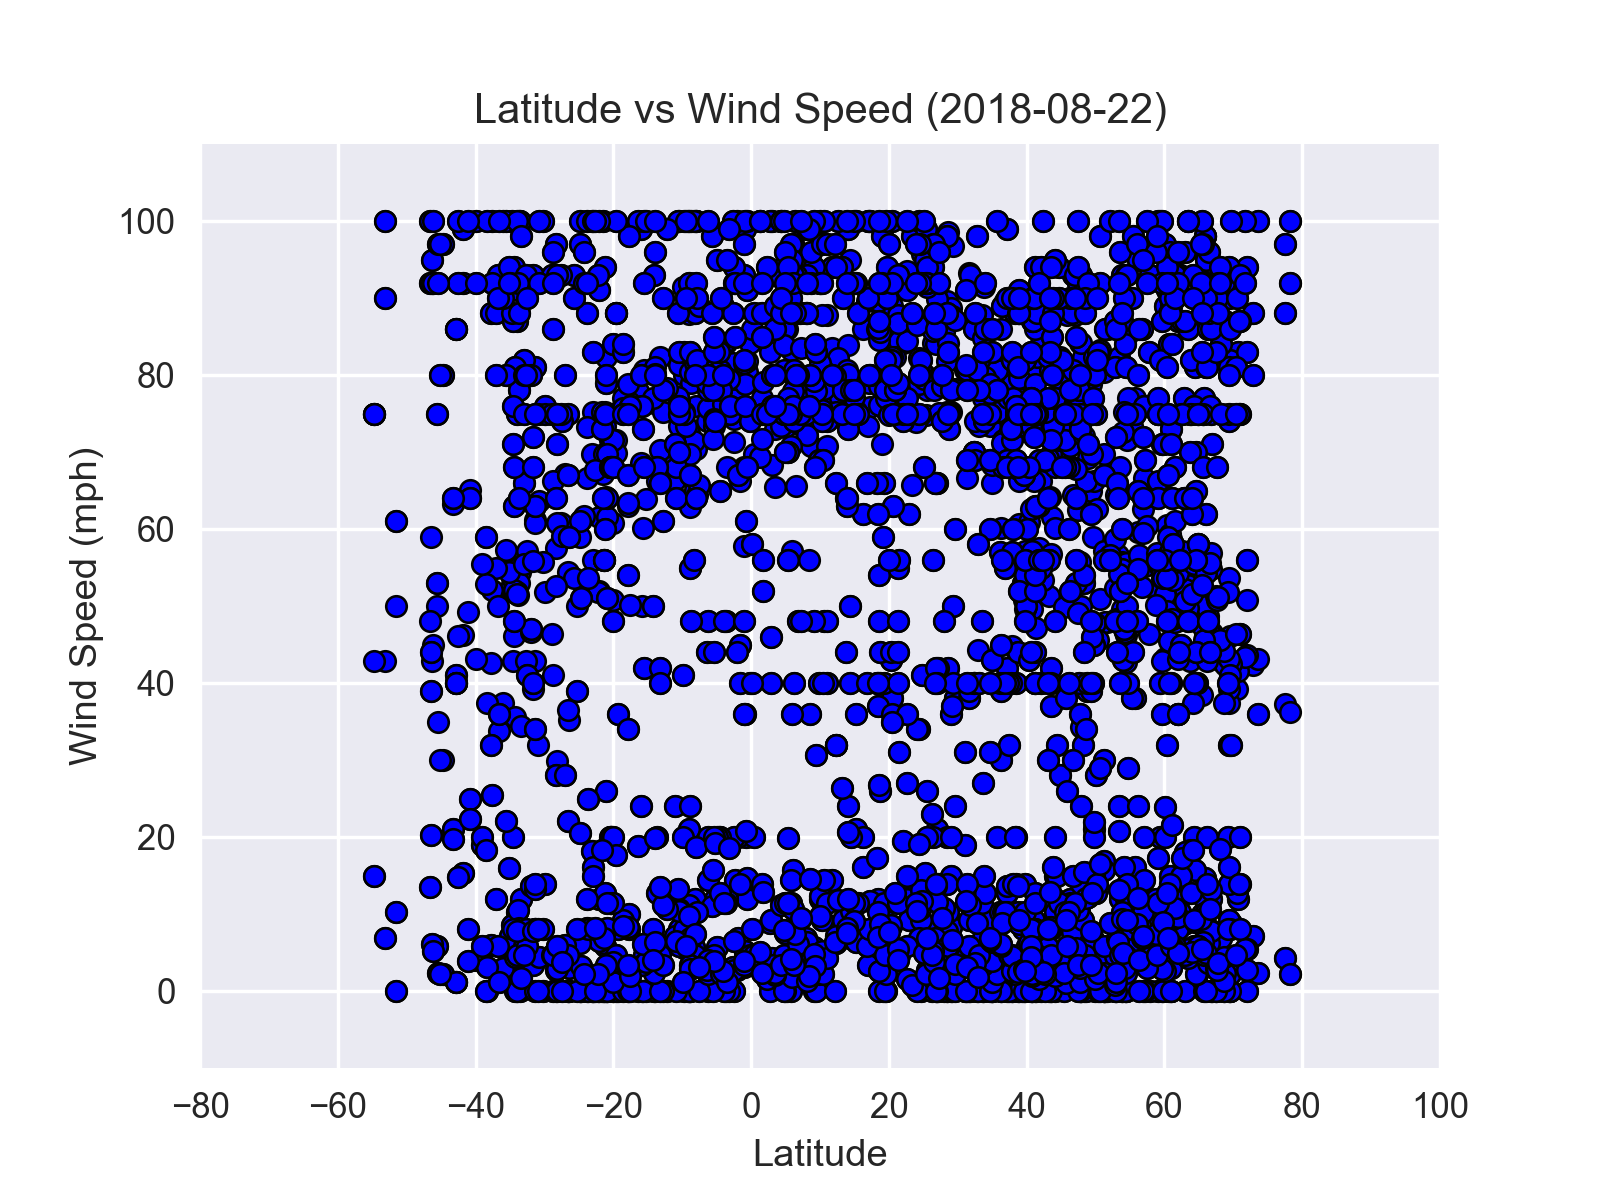

In [68]:
#Latitude Vs Temperature parameters
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Pull date and reset to run in local timezone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')

#setting labels
plt.title(f"Latitude Vs. Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)

sns.set()
plt.show()

# Saving plot table to a png
plt.savefig('Latitude_vs_MaxTemp.png')

# __Latitude Vs. Humidity__ 

<IPython.core.display.Javascript object>


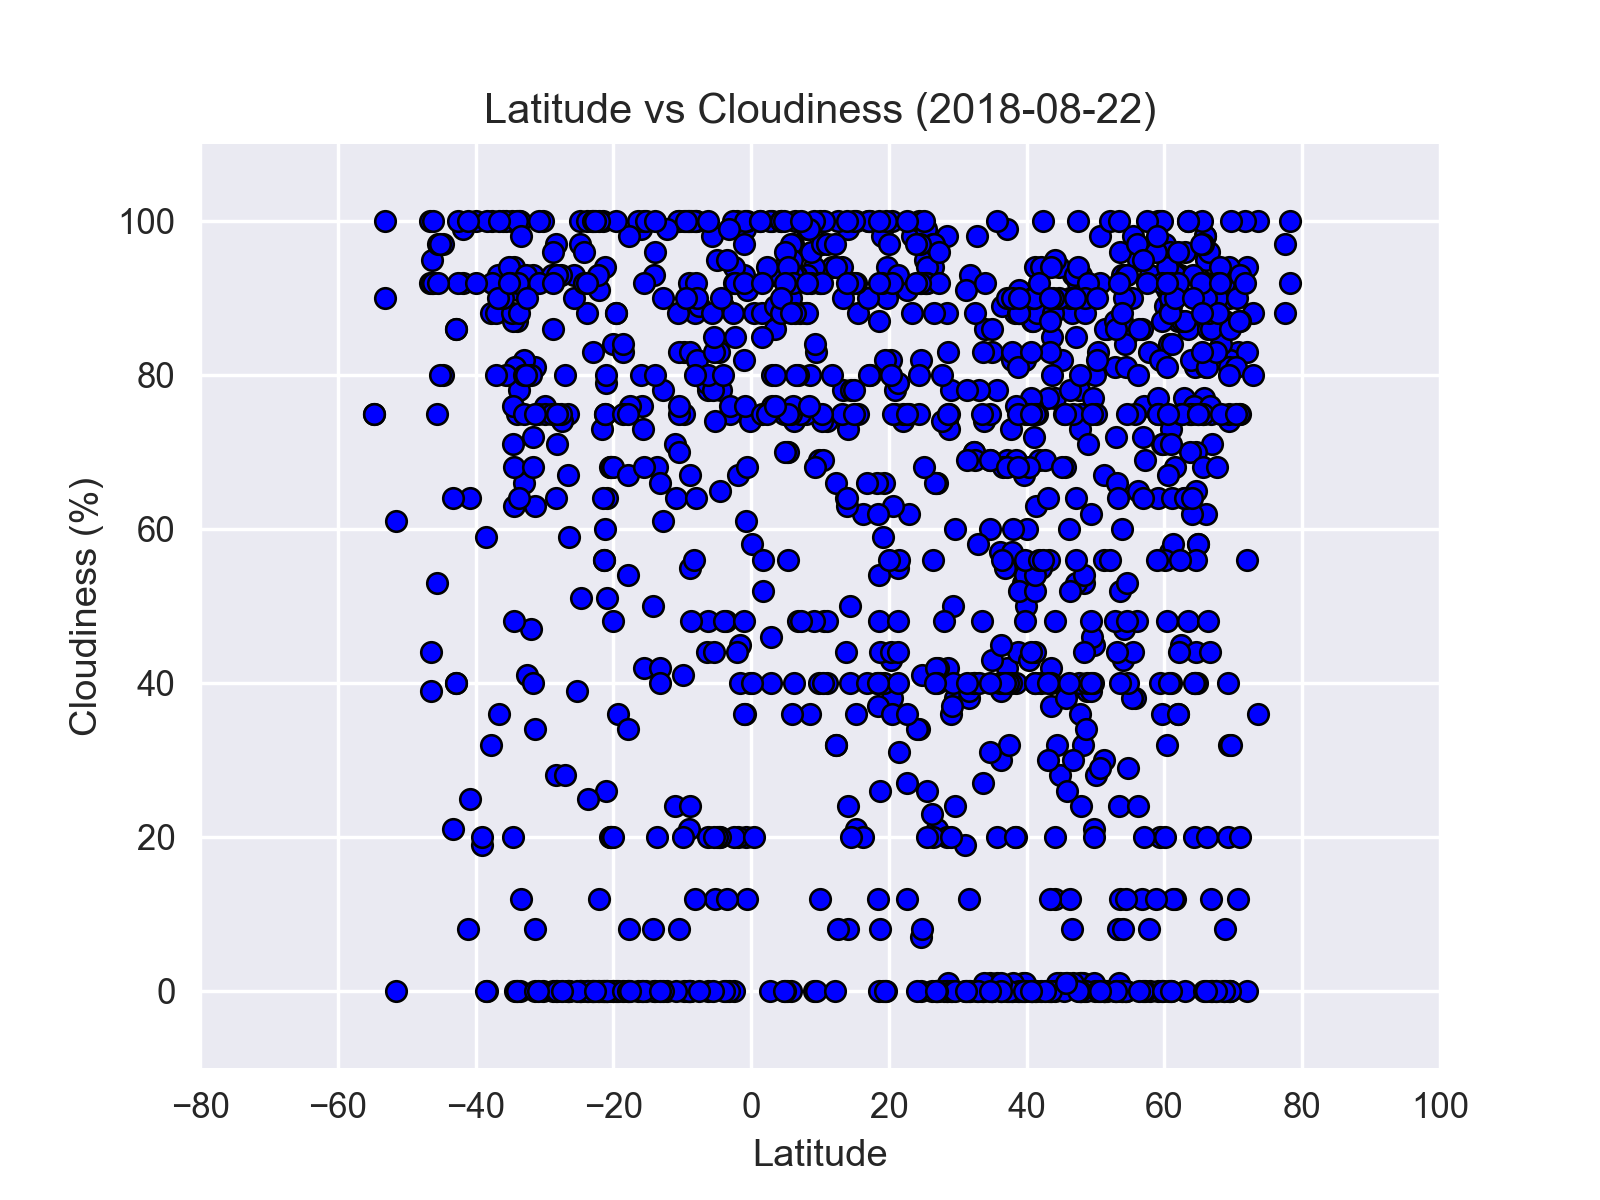

In [77]:
# Lattitude vs Humidity parameters
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Pull date and reset to run in local timezone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')

# setting labels
plt.title(f"Latitude vs Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)

sns.set()
plt.show()

# Saving plot table to a png
plt.savefig('Humidity_vs_Latitude.png')

# __Latitude vs. Cloudiness__

<IPython.core.display.Javascript object>


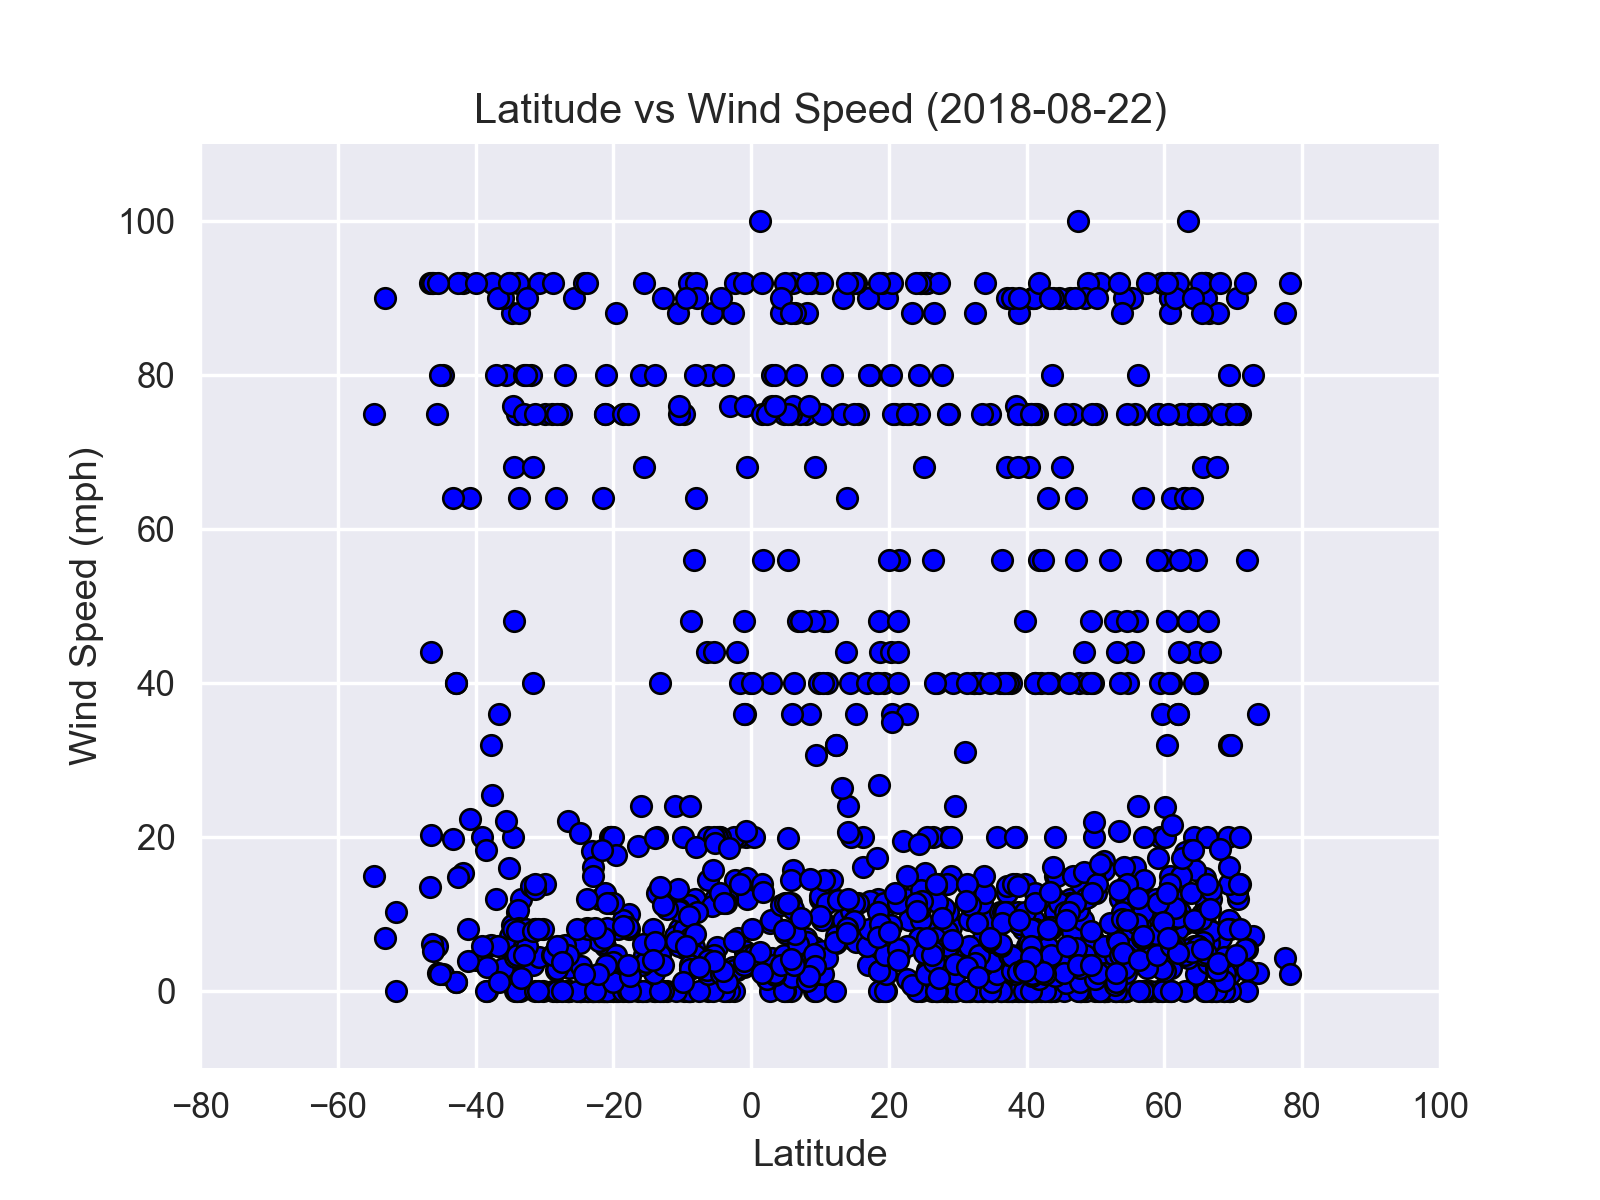

In [81]:
# Lattitude vs Cloudiness parameters
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Pull date and reset to run in local timezone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')

# setting labels
plt.title(f"Latitude vs Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)

sns.set()
plt.show()

# # Saving plot table to a png
plt.savefig('Latitude_vs_Cloudiness.png')

# __Latitude vs. Wind Speed__

<IPython.core.display.Javascript object>


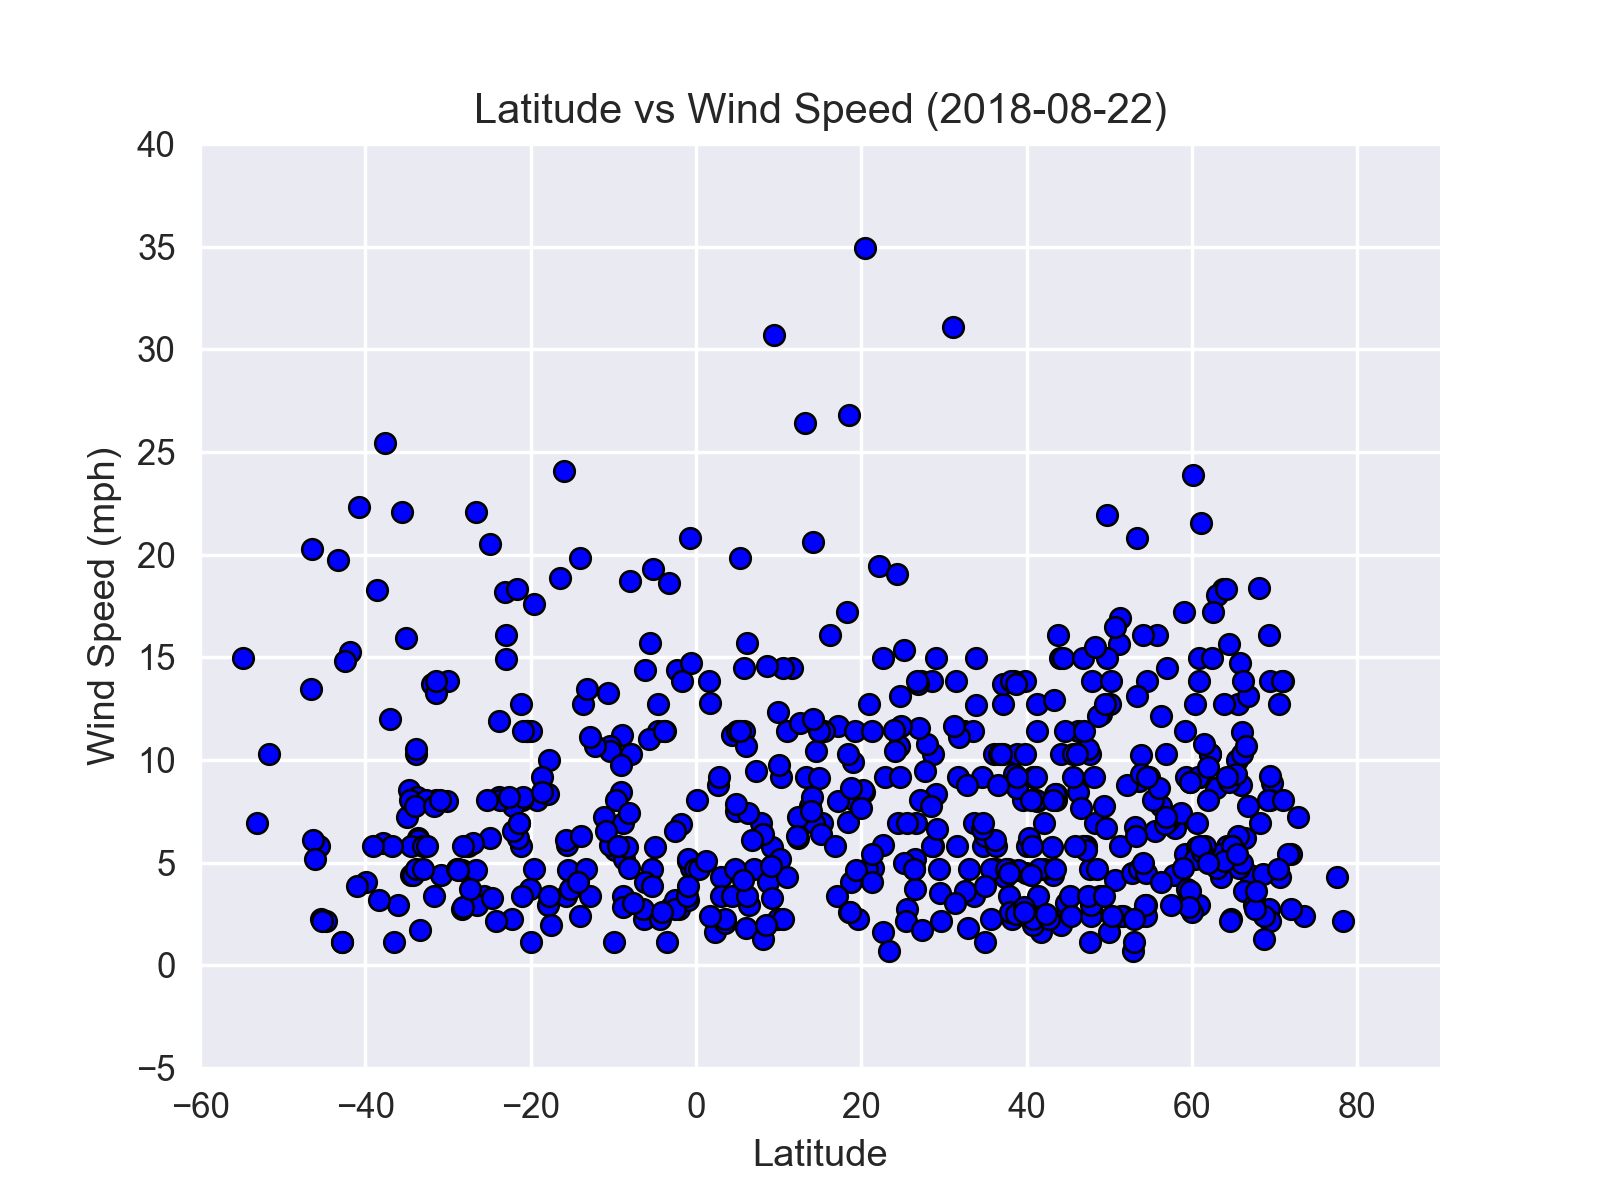

In [88]:
# Lattitude vs Cloudiness parameters
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Pull date and reset to run in local timezone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')

# setting labels
plt.title(f"Latitude vs Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-60,90)
plt.ylim(-5, 40)

sns.set()
plt.show()

# # Saving plot table to a png
plt.savefig('Latitude_vs_WindSpeed.png')